<a href="https://colab.research.google.com/github/Yosuke-Sugiura/MachineLearning_Exercise/blob/main/%E8%AD%98%E5%88%A5%E3%81%AB%E9%96%A2%E3%81%99%E3%82%8B%E3%82%B3%E3%83%BC%E3%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ準備

必要データをGoogle Driveにダウンロードして使用する．
ドライブをマウント(連携)するには，左のツーツバーのアイコンから「フォルダ」をクリック，左から３番めの「ドライブをマウント」ボタンをクリックする．

ただし，このコードではGithubにアップロードされているcsvデータをダウンロードする．

In [4]:
! wget "https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/titanic.csv" -O "titanic.csv"

--2024-07-23 00:56:27--  https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14117 (14K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  13.79K  --.-KB/s    in 0s      

2024-07-23 00:56:27 (39.4 MB/s) - ‘titanic.csv’ saved [14117/14117]



# ランダムフォレスト
---



Accuracy: 0.97


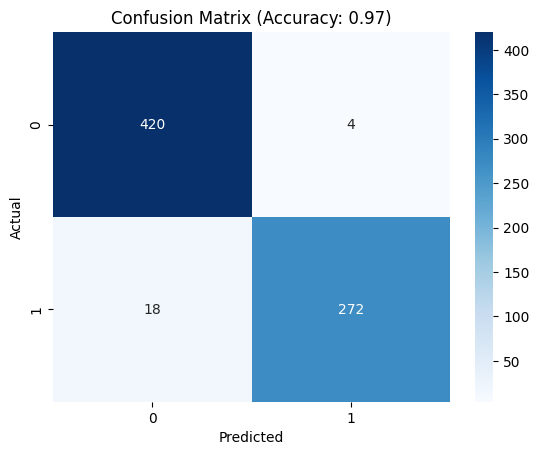

In [10]:
# 必要なライブラリのインポート
import numpy as np                                 # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt           # matplotlibモジュール:図を表示するためのもの
import seaborn as sns                              # seabornモジュール:図を表示するためのもの
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# データの読み込み
with open("titanic.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 最後の列を目的変数に設定
X = data[:, :-1]       # 最後の列を除く全ての列を特徴量に
y = data[:, -1]        # 最後の列（目的変数）

# ランダムフォレストモデルの作成と訓練
# n_estimators : 決定木の数．多いほど汎化性能が向上する
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X, y)

# 予測
y_pred = model.predict(X)

# 精度の計算
accuracy = accuracy_score(y,  y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 混合行列を表示
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.show()

---
# 学習用データとテスト用データを分割する (LLM生成AIの活用)

元のデータセットを分割して，学習用のデータとテスト用のデータを作成しよう．
コードを作成することは簡単ではないので，ChatGPTなどのLLMサービスにお願いしよう．
1. プロンプトを入力して実行する．
  - "ランダムフォレストを行う"など目的を明確に示す．
  - "学習用とテスト用でデータを分割したい" とほしい結果を示す．
  - 上のコードを`Ctl+C`でコピーして貼り付けるとコードを改修してくれる．
2. 結果が気に入らなければ，回答のうちどこを修正してほしいかをプロンプトとして入力して実行する．
3. エラーが出れば，エラー文をプロンプトに入力して実行すれば解決案を提示してくれる．